In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [5]:
tickers = ['^GSPC', '^IXIC', '^GDAXI'] # tickers of the major indices

I have had to leave out ^FTSE from this list of indices because historical data for FTSE is no longer available from yahoo

S&P500 = GSPC,
NASDAQ = IXIC,
German DAX = GDAXI

we add a hat in front of each ticker to signify we are dealing with market index data

In [52]:
ind_data = pd.DataFrame()  # ind_data represents index data

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='1997-1-1')['Adj Close']

In [53]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
1997-01-02,737.010010,1280.699951,2820.810059
1997-01-03,748.030029,1310.680054,2863.260010
1997-01-06,747.650024,1316.400024,2890.199951
1997-01-07,753.229980,1327.729980,2876.340088
1997-01-08,748.409973,1320.349976,2904.080078


In [54]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2020-11-02,3310.239990,10957.610352,11788.280273
2020-11-03,3369.159912,11160.570312,12088.980469
2020-11-04,3443.439941,11590.780273,12324.219727
2020-11-05,3510.449951,11890.929688,12568.089844
2020-11-06,3509.439941,11895.229492,12480.019531


Now again we want to normalise all the data to 100 so we can directly compare their growth

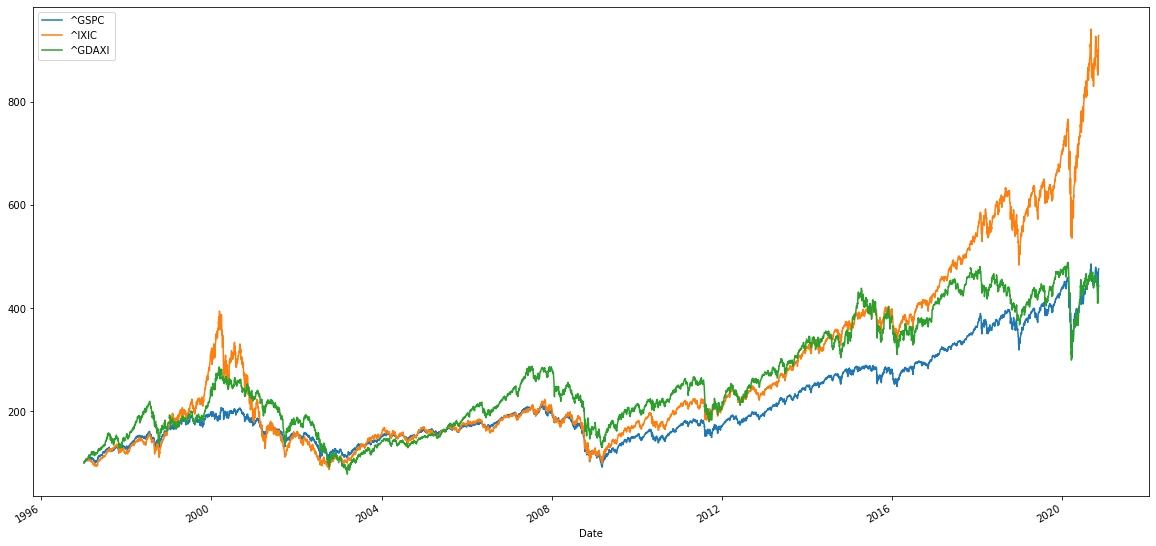

In [55]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(20,10))
plt.show()

Now if we want to calculate the returns of each index we will use the below

In [58]:
ind_returns = (ind_data / ind_data.shift(1)) - 1  # .shift(1) shifts the column down by one - essentially we divide each closing price by the closing price of the previous day and then subtract to get the ratio of growth per day

ind_returns.tail()

ind_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6004 entries, 1997-01-02 to 2020-11-06
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   6003 non-null   float64
 1   ^IXIC   6003 non-null   float64
 2   ^GDAXI  5792 non-null   float64
dtypes: float64(3)
memory usage: 187.6 KB


In [60]:
annual_ind_returns = ind_returns.mean() * 250  # .mean() will calculate the average daily rate of return for each index, we multiply the average by 250 which leaves us with the mean of the annual returns
annual_ind_returns

^GSPC     0.084502
^IXIC     0.124729
^GDAXI    0.075464
dtype: float64

and the above displays the mean annual returns for each index

Now let's compare the growth of one specific stock to the growth on indices.

In [63]:
tickers = ['PG', '^GSPC', '^DJI']  # so we will be comparing the growth or proctor and gamble to S&P and Dow Jones

data_2 = pd.DataFrame()

for t in tickers:
    data_2[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [64]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2020-11-02,138.500000,3310.239990,26925.050781
2020-11-03,141.220001,3369.159912,27480.029297
2020-11-04,140.639999,3443.439941,27847.660156
2020-11-05,142.380005,3510.449951,28390.179688
2020-11-06,143.229996,3509.439941,28323.400391


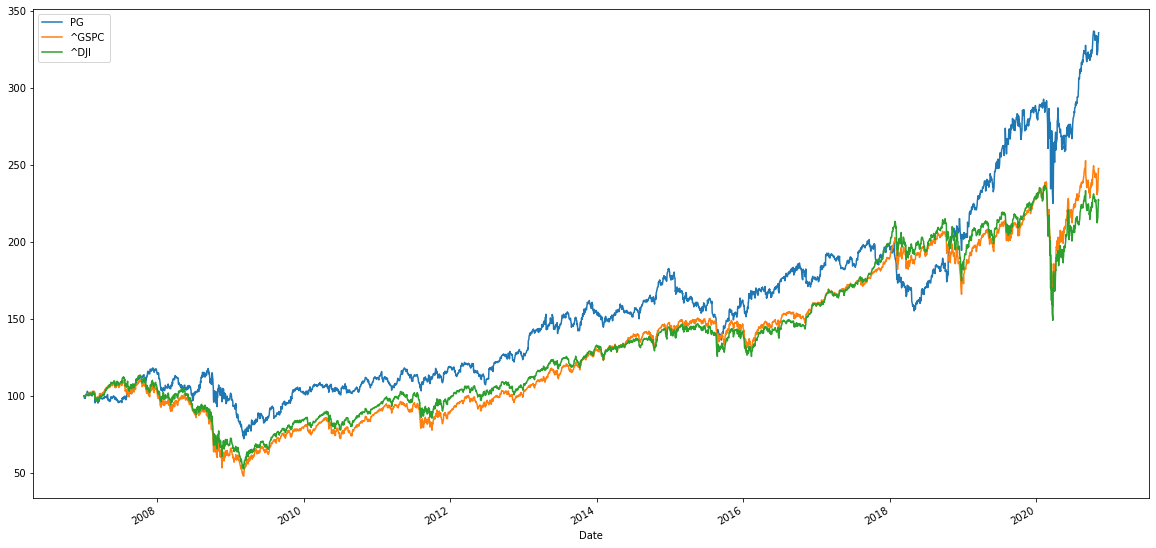

In [67]:
(data_2 / data_2.iloc[0] * 100).plot(figsize=(20, 10))  # again we normalise the data to 100
plt.show()

And here we can see proctor & gamble outperformed both indices